In [1]:
# Erin Howland
# DSC540
# wk 5
# 10 Oct 2021

In [2]:
# Data Wrangling with Python Activity 7

In [3]:
# import libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [4]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [5]:
# html to BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})
table

<table border="1" class="wikitable sortable static-row-numbers plainrowheaders srn-white-background" style="text-align:right;">
<caption>GDP (US$ million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country or territory
</th>
<th rowspan="2"><a class="mw-redirect" href="/wiki/UN_region" title="UN region">Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="#cite_note-GDP_IMF-1">[1]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">UN</a><sup class="reference" id="cite_ref-UN_13-0"><a href="#cite_note-UN-13">[12]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[13]</a></sup>
</th></tr>
<tr class="static-row-header" style="text-align:center;ver

In [6]:
# convert to df
df = pd.read_html(str(table))
df = pd.DataFrame(df[0])
df.head()

Country or territory    Region      IMF[1]               UN[12]             \
  Country or territory    Region    Estimate       Year  Estimate       Year   
0      United States *  Americas  22675271.0       2021  21433226       2020   
1              China *      Asia  16642318.0  [n 2]2021  14342933  [n 3]2020   
2              Japan *      Asia   5378136.0       2021   5082465       2020   
3            Germany *    Europe   4319286.0       2021   3861123       2020   
4     United Kingdom *    Europe   3124650.0       2021   2826441       2020   

  World Bank[13]        
        Estimate  Year  
0     20936600.0  2020  
1     14722731.0  2020  
2      5064873.0  2019  
3      3806060.0  2020  
4      2707744.0  2020

In [7]:
# Data Wrangling with Python Activity 8

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# read file
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [10]:
# check for duplicates
print('Duplicate first name: {}'.format(any(df.first_name.duplicated())))
print('Duplicate last name: {}'.format(any(df.last_name.duplicated())))
print('Duplicate email: {}'.format(any(df.email.duplicated())))

Duplicate first name: True
Duplicate last name: True
Duplicate email: False


In [11]:
# essential col contains NaN?
df.isna().any()

id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool

In [12]:
# remove outliers
df_new = df[np.isfinite(df['visit'])]
df_new.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [13]:
# report size difference (rows)
print('Original Size (rows): ', df.shape[0])
print('New Size (rows): ', df_new.shape[0])
print('Difference (rows): ', df.shape[0] - df_new.shape[0])

Original Size (rows):  1000
New Size (rows):  974
Difference (rows):  26


{'whiskers': [<matplotlib.lines.Line2D at 0x24035fce520>,
 'caps': [<matplotlib.lines.Line2D at 0x24035fcebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24035fce1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24035fe12e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24035fe1640>],
 'means': []}

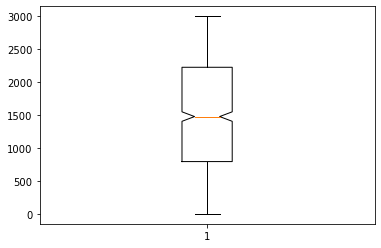

In [14]:
# box plot to check for outliers
plt.boxplot(df_new.visit, notch = True)

In [15]:
# remove outliers
# 750-2300-ish is bulk of data per box plot

df_final = df_new[df_new['visit'] >= 100]
df_final = df_final[df_final['visit'] <= 2900]
print('Final size (rows): ', df_final.shape[0])

Final size (rows):  923


In [16]:
# Python for Data Analysis p 191

In [17]:
# import libraries
import sqlite3

In [18]:
query = """
   .....: CREATE TABLE testcontact
   .....: (a VARCHAR(20), b VARCHAR(20),
   .....:  c VARCHAR(20), d VARCHAR(20),
   .....:  e INTEGER    , f VARCHAR(20)
   .....: );"""

# McKinney, Wes. Python for Data Analysis . O'Reilly Media. Kindle Edition. 

In [19]:
con = sqlite3.connect('mydata.sqlite')

In [20]:
con.execute(query)

In [21]:
con.commit()

In [22]:
# create data
# Name, Address, City, State, Zip, Phone Number
data = [('George Washington', '10 Washington Way', 'Springfield', 'VA', 12345, '263-632-1776'),
        ('George Carver', '120 Carver St', 'Springfield', 'MO', 67890, '452-951-4682'),
        ('George Handel', '1727 Zadok Ave', 'Springfield', 'PA', 20065, '945-785-0321'), 
        ('George Clooney', '900 Hospital Blvd', 'Springfield', 'CA', 90211, '980-456-3220'),
        ('George Sand', '760 Marquis Blvd', 'Springfield', 'LA', 73402, '460-132-0231'),
        ('George Windsor', '1080 London Rd', 'Springfield', 'FL', 42895, '222-684-8875'),
        ('George Reeves', '66 Krypton St', 'Springfield', 'KY', 29971, '301-159-3576'),
        ('George Martin', '675 Iron Throne Dr', 'Springfield', 'IL', 80840, '801-442-6844'),
        ('George Gershwin', '64855 Rhapsody Cir', 'Springfield', 'NY', 11568, '640-642-3012'),
        ('George McClellon', '1885 Union Ave', 'Springfield', 'VA', 36066, '123-465-7890'),
       ]

In [23]:
stmt = "INSERT INTO testcontact VALUES (?, ?, ?, ?, ?, ?)"

In [24]:
con.executemany(stmt, data)

In [25]:
con.commit()

In [26]:
cursor = con.execute('select * from testcontact')

In [27]:
rows = cursor.fetchall()

In [28]:
rows

[('George Washington',
  '10 Washington Way',
  'Springfield',
  'VA',
  12345,
  '263-632-1776'),
 ('George Carver',
  '120 Carver St',
  'Springfield',
  'MO',
  67890,
  '452-951-4682'),
 ('George Handel',
  '1727 Zadok Ave',
  'Springfield',
  'PA',
  20065,
  '945-785-0321'),
 ('George Clooney',
  '900 Hospital Blvd',
  'Springfield',
  'CA',
  90211,
  '980-456-3220'),
 ('George Sand',
  '760 Marquis Blvd',
  'Springfield',
  'LA',
  73402,
  '460-132-0231'),
 ('George Windsor',
  '1080 London Rd',
  'Springfield',
  'FL',
  42895,
  '222-684-8875'),
 ('George Reeves',
  '66 Krypton St',
  'Springfield',
  'KY',
  29971,
  '301-159-3576'),
 ('George Martin',
  '675 Iron Throne Dr',
  'Springfield',
  'IL',
  80840,
  '801-442-6844'),
 ('George Gershwin',
  '64855 Rhapsody Cir',
  'Springfield',
  'NY',
  11568,
  '640-642-3012'),
 ('George McClellon',
  '1885 Union Ave',
  'Springfield',
  'VA',
  36066,
  '123-465-7890')]

In [29]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None),
 ('e', None, None, None, None, None, None),
 ('f', None, None, None, None, None, None))

In [30]:
pd.DataFrame(rows, columns = [x[0] for x in cursor.description]).head(10)

,a,b,c,d,e,f
0,George Washington,10 Washington Way,Springfield,VA,12345,263-632-1776
1,George Carver,120 Carver St,Springfield,MO,67890,452-951-4682
2,George Handel,1727 Zadok Ave,Springfield,PA,20065,945-785-0321
3,George Clooney,900 Hospital Blvd,Springfield,CA,90211,980-456-3220
4,George Sand,760 Marquis Blvd,Springfield,LA,73402,460-132-0231
5,George Windsor,1080 London Rd,Springfield,FL,42895,222-684-8875
6,George Reeves,66 Krypton St,Springfield,KY,29971,301-159-3576
7,George Martin,675 Iron Throne Dr,Springfield,IL,80840,801-442-6844
8,George Gershwin,64855 Rhapsody Cir,Springfield,NY,11568,640-642-3012
9,George McClellon,1885 Union Ave,Springfield,VA,36066,123-465-7890
